# Supervised Machine Learning

### 1. Preparing Notebook

### 2. Data Cleaning

### 3. Prepping Data for Regression Analysis

### 4. Running a Regression Analysis

## 1. Preparing Notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'C:\Users\Matt\Documents\Data Analysis Course\Medal_Count_GDP_Project'

In [5]:
# Importing data set

df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','Average_GDP.csv'))

# 2. Data Cleaning

In [6]:
# Checking shape

df.shape

(164408, 19)

In [7]:
# Checking Columns

df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Name', 'Sex', 'Age', 'Weight (kg)',
       'Height (cm)', 'Country Name', 'Year', 'Season', 'Location', 'Sport',
       'Event', 'Medal', 'After 1960', 'GDP', 'Total Country Medal Count',
       'Average Country GDP'],
      dtype='object')

In [8]:
# Getting rid of unneeded columns

df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'ID'])

In [9]:
df.head(10)

,Name,Sex,Age,Weight (kg),Height (cm),Country Name,Year,Season,Location,Sport,Event,Medal,After 1960,GDP,Total Country Medal Count,Average Country GDP
0,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Yes,366.460692,901,2656.268669
1,Bai Chongguang,M,21.0,184.0,83.0,China,1992,Summer,Barcelona,Boxing,Boxing Men's Light-Heavyweight,NaN,Yes,366.460692,901,2656.268669
2,Bai Mei,F,17.0,166.0,46.0,China,1992,Summer,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,Yes,366.460692,901,2656.268669
3,Bi Zhong,M,23.0,188.0,110.0,China,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,NaN,Yes,366.460692,901,2656.268669
4,Cai Yanshu,M,28.0,169.0,79.0,China,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,Yes,366.460692,901,2656.268669
5,Cao Mianying,F,25.0,176.0,71.0,China,1992,Summer,Barcelona,Rowing,Rowing Women's Coxless Fours,NaN,Yes,366.460692,901,2656.268669
6,Cao Mianying,F,25.0,176.0,71.0,China,1992,Summer,Barcelona,Rowing,Rowing Women's Coxed Eights,NaN,Yes,366.460692,901,2656.268669
7,Chao Lu,M,22.0,180.0,75.0,China,1992,Summer,Barcelona,Boxing,Boxing Men's Middleweight,NaN,Yes,366.460692,901,2656.268669
8,Chen Biao,M,21.0,188.0,80.0,China,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Team",NaN,Yes,366.460692,901,2656.268669
9,Chen Cailiang,M,22.0,165.0,63.0,China,1992,Summer,Barcelona,Judo,Judo Men's Extra-Lightweight,NaN,Yes,366.460692,901,2656.268669


In [10]:
# Checking for missing values

df.isnull().sum()

Name                              0
Sex                               0
Age                             957
Weight (kg)                    8494
Height (cm)                    9040
Country Name                      0
Year                              0
Season                            0
Location                          0
Sport                             0
Event                             0
Medal                        144357
After 1960                        0
GDP                           12363
Total Country Medal Count         0
Average Country GDP              48
dtype: int64

In [11]:
df['Average Country GDP'].describe()

count    164360.000000
mean      16970.539406
std       12009.986327
min         153.628683
25%        4768.396582
50%       19245.916620
75%       25729.523570
max      104420.599500
Name: Average Country GDP, dtype: float64

In [12]:
# Imputing the mean for the missing values in the 'GDP' column. 
# Not worried about the missing values in the other fields. None will affect our analysis.

df['Average Country GDP'].fillna(df['Average Country GDP'].mean(), inplace = True)

In [13]:
# Checking imputation

df.isnull().sum()

Name                              0
Sex                               0
Age                             957
Weight (kg)                    8494
Height (cm)                    9040
Country Name                      0
Year                              0
Season                            0
Location                          0
Sport                             0
Event                             0
Medal                        144357
After 1960                        0
GDP                           12363
Total Country Medal Count         0
Average Country GDP               0
dtype: int64

## 4. Prepping Data for Regression Analysis

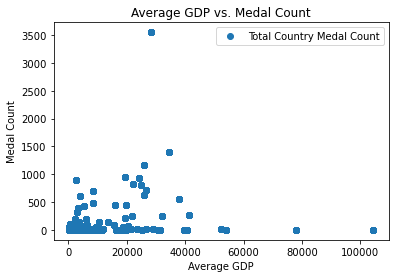

In [14]:
# Creating scatterplot to visualize our two variables

df.plot(x = 'Average Country GDP', y='Total Country Medal Count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average GDP vs. Medal Count')  
plt.xlabel('Average GDP')  
plt.ylabel('Medal Count')  
plt.show()

#### My hypothesis is: As the GDP of a country increases, so too does that country's medal count at the Olympics.

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Average Country GDP'].values.reshape(-1,1)
y = df['Total Country Medal Count'].values.reshape(-1,1)

In [16]:
X

array([[2656.268669 ],
       [2656.268669 ],
       [2656.268669 ],
       ...,
       [ 572.3816367],
       [ 572.3816367],
       [ 572.3816367]])

In [17]:
y

array([[901],
       [901],
       [901],
       ...,
       [  0],
       [  0],
       [  0]], dtype=int64)

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 3. Running a Regression Analysis

In [19]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

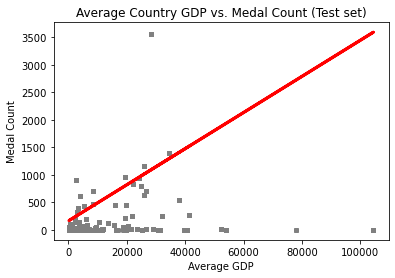

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Average Country GDP vs. Medal Count (Test set)')
plot_test.xlabel('Average GDP')
plot_test.ylabel('Medal Count')
plot_test.show()

#### The regression line doesn't seem to be all that accurate, with many points existing really far off the fitted line

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [24]:
# Checking summary stats

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03282829]]
Mean squared error:  625831.1202776628
R2 score:  0.19140289362531904


In [25]:
# Array of predicted y values

y_predicted

array([[ 983.75111405],
       [1217.5376289 ],
       [1014.66530695],
       ...,
       [ 441.90283329],
       [ 511.67536719],
       [1517.09634733]])

In [26]:
# Comparing actual values to predicted values

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,807,983.751114
1,246,1217.537629
2,632,1014.665307
3,254,883.556233
4,901,251.446463
5,77,345.730069
6,400,266.522251
7,938,952.711448
8,807,983.751114
9,77,278.272510


#### The model seems to be a pretty poor fit on the test values. If I were to get rid of the extreme values, I may be able to come up with a model that's a bit more accurate, but I doubt any bit of cleaning would help create a model that would produce reliable predictions.

In [27]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Regression_Data.csv'))